In [37]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh40/inc50/BHOSS_CODE"
data = "Rh40_Rl1_sig1_i50_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A0_122.dat"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=0)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9254.740756 Rg/c, inclination: 50.000000 deg, phi: 0.000000 deg, BH spin: 0.000000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check self.obs_freqs!
N_obs_freqs is now overlaid to len(self.obs_freqs)
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 8.03209e-14 0.000847596
Total flux = 2.005715 Jy at 230 GHz


===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9994.199844 Rg/c, inclination: 10.000000 deg, phi: 0.000000 deg, BH spin: 0.000000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check obs_freqs!
N_obs_freqs is now overlaid to len(obs_freqs)
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
(zmin,zmax)= 0.0 0.000706467
Total flux = 2.093195 Jy at 230 GHz
137:45:36.638 - Start Program


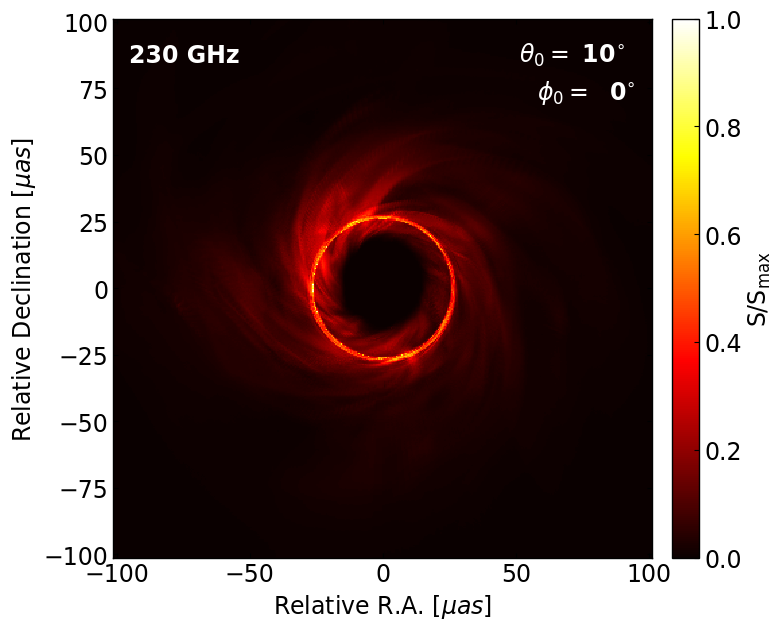

In [10]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc10/BHOSS_CODE"
#data = "Rh1_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_331.dat"

filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=0,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [1]:
import os
import numpy as np

#find average flux
def bhoss_avg(Rhigh,Rlow,sig,inclination,phi0,model_name):

    if (model_name == "MADS41A5"):
        model_str = "bhoss_MA05"
        ind_start = 311
        ind_end = 410
    elif (model_name == "MADS41A0"):
        model_str = "bhoss_MA0"
        ind_start = 97
        ind_end = 196
    elif (model_name == "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name == "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    else:
        print("no model")
        return
    
    if ((Rhigh==1) | (Rhigh==5) | (Rhigh==10) | (Rhigh==20) | (Rhigh==40) | (Rhigh==80) | (Rhigh==160)):
        Rh_str = "Rh%d"%Rhigh
    else:
        print("no model")
        return
    
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/lustre04/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Rh_str,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    for image_ind in range(ind_start,ind_end+1):
        data_name="Rh%d_Rl%d_sig%d_i%d_ph%d_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_%s_%d.dat" \
        %(Rhigh,Rlow,sig,inclination,phi0,model_name,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 2))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+"Rh%d"%Rhigh,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

In [2]:
ind,time,z_tot,dscale = bhoss_avg(40, 1, 1, 10, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh40/inc10/BHOSS_CODE
97, flux: 2.483066 at 9004.234232
98, flux: 2.443939 at 9014.746059
99, flux: 2.409841 at 9023.505435
100, flux: 2.322954 at 9034.016452
101, flux: 2.251037 at 9044.529609
102, flux: 2.207195 at 9053.290056
103, flux: 2.129155 at 9063.802536
104, flux: 2.072512 at 9074.314016
105, flux: 2.078236 at 9084.823874
106, flux: 2.064223 at 9093.581252
107, flux: 2.081735 at 9104.090482
108, flux: 2.089524 at 9114.601360
109, flux: 2.075104 at 9123.359993
110, flux: 2.086853 at 9133.870253
111, flux: 2.100368 at 9144.379583
112, flux: 2.110369 at 9154.889223
113, flux: 2.103766 at 9163.648327
114, flux: 2.094621 at 9174.157990
115, flux: 2.073504 at 9184.666192
116, flux: 2.074846 at 9193.424046
117, flux: 2.064612 at 9203.933544
118, flux: 2.091499 at 9214.444133
119, flux: 2.117674 at 9224.955775
120, flux: 2.122039 at 9233.717169
121, flux: 2.135423 at 9244.228854
122, flux: 2.152434 at 9254.740756
123, flux

In [3]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh40/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [4]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh40/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.002029 Jy, the density scale = 2.420000e-18


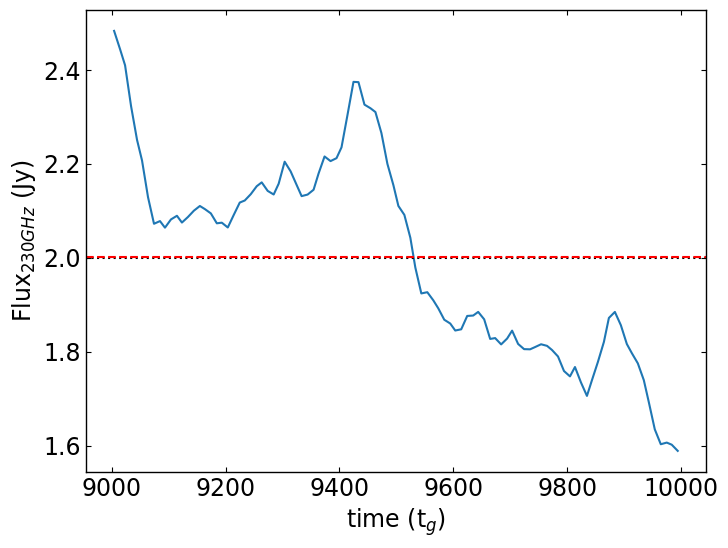

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [6]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.483066 Jy at 9004.234232
98:: 2.443939 Jy at 9014.746059
99:: 2.409841 Jy at 9023.505435
100:: 2.322954 Jy at 9034.016452
101:: 2.251037 Jy at 9044.529609
102:: 2.207195 Jy at 9053.290056
103:: 2.129155 Jy at 9063.802536
104:: 2.072512 Jy at 9074.314016
105:: 2.078236 Jy at 9084.823874
106:: 2.064223 Jy at 9093.581252
107:: 2.081735 Jy at 9104.090482
108:: 2.089524 Jy at 9114.601360
109:: 2.075104 Jy at 9123.359993
110:: 2.086853 Jy at 9133.870253
111:: 2.100368 Jy at 9144.379583
112:: 2.110369 Jy at 9154.889223
113:: 2.103766 Jy at 9163.648327
114:: 2.094621 Jy at 9174.157990
115:: 2.073504 Jy at 9184.666192
116:: 2.074846 Jy at 9193.424046
117:: 2.064612 Jy at 9203.933544
118:: 2.091499 Jy at 9214.444133
119:: 2.117674 Jy at 9224.955775
120:: 2.122039 Jy at 9233.717169
121:: 2.135423 Jy at 9244.228854
122:: 2.152434 Jy at 9254.740756
123:: 2.160625 Jy at 9263.502558
124:: 2.142464 Jy at 9274.015079
125:: 2.134835 Jy at 9284.527261
126:: 2.157788 Jy at 9293.287130
127:: 2.20463

In [17]:
ind,time,z_tot,dscale = bhoss_avg(40, 1, 1, 30, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh40/inc30/BHOSS_CODE
97, flux: 2.698670 at 9004.234232
98, flux: 2.655637 at 9014.746059
99, flux: 2.620132 at 9023.505435
100, flux: 2.532113 at 9034.016452
101, flux: 2.447948 at 9044.529609
102, flux: 2.395733 at 9053.290056
103, flux: 2.307663 at 9063.802536
104, flux: 2.224838 at 9074.314016
105, flux: 2.213739 at 9084.823874
106, flux: 2.196028 at 9093.581252
107, flux: 2.242617 at 9104.090482
108, flux: 2.245374 at 9114.601360
109, flux: 2.214644 at 9123.359993
110, flux: 2.204716 at 9133.870253
111, flux: 2.220521 at 9144.379583
112, flux: 2.227685 at 9154.889223
113, flux: 2.218524 at 9163.648327
114, flux: 2.195427 at 9174.157990
115, flux: 2.154266 at 9184.666192
116, flux: 2.138059 at 9193.424046
117, flux: 2.105977 at 9203.933544
118, flux: 2.108623 at 9214.444133
119, flux: 2.119612 at 9224.955775
120, flux: 2.122950 at 9233.717169
121, flux: 2.140335 at 9244.228854
122, flux: 2.167214 at 9254.740756
123, flux

In [18]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh40/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [19]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh40/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.072177 Jy, the density scale = 2.290000e-18


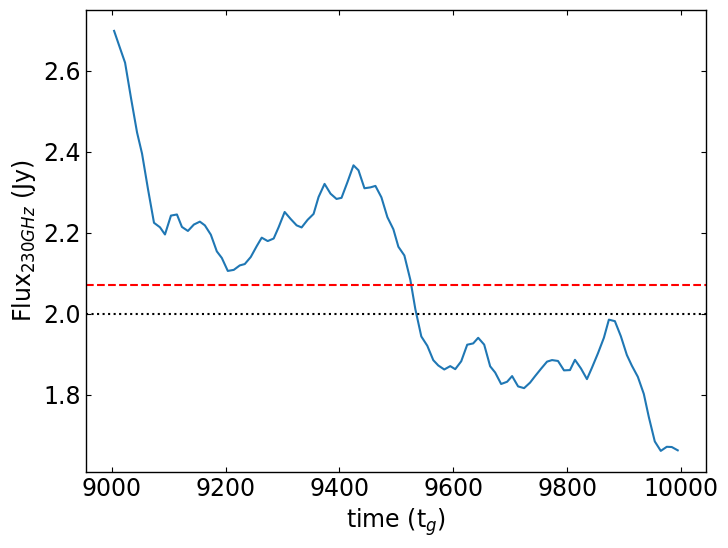

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [21]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.698670 Jy at 9004.234232
98:: 2.655637 Jy at 9014.746059
99:: 2.620132 Jy at 9023.505435
100:: 2.532113 Jy at 9034.016452
101:: 2.447948 Jy at 9044.529609
102:: 2.395733 Jy at 9053.290056
103:: 2.307663 Jy at 9063.802536
104:: 2.224838 Jy at 9074.314016
105:: 2.213739 Jy at 9084.823874
106:: 2.196028 Jy at 9093.581252
107:: 2.242617 Jy at 9104.090482
108:: 2.245374 Jy at 9114.601360
109:: 2.214644 Jy at 9123.359993
110:: 2.204716 Jy at 9133.870253
111:: 2.220521 Jy at 9144.379583
112:: 2.227685 Jy at 9154.889223
113:: 2.218524 Jy at 9163.648327
114:: 2.195427 Jy at 9174.157990
115:: 2.154266 Jy at 9184.666192
116:: 2.138059 Jy at 9193.424046
117:: 2.105977 Jy at 9203.933544
118:: 2.108623 Jy at 9214.444133
119:: 2.119612 Jy at 9224.955775
120:: 2.122950 Jy at 9233.717169
121:: 2.140335 Jy at 9244.228854
122:: 2.167214 Jy at 9254.740756
123:: 2.188124 Jy at 9263.502558
124:: 2.179730 Jy at 9274.015079
125:: 2.186035 Jy at 9284.527261
126:: 2.214134 Jy at 9293.287130
127:: 2.25154

In [38]:
ind,time,z_tot,dscale = bhoss_avg(40, 1, 1, 50, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh40/inc50/BHOSS_CODE
97, flux: 2.744697 at 9004.234232
98, flux: 2.684109 at 9014.746059
99, flux: 2.641499 at 9023.505435
100, flux: 2.550515 at 9034.016452
101, flux: 2.456541 at 9044.529609
102, flux: 2.391966 at 9053.290056
103, flux: 2.287397 at 9063.802536
104, flux: 2.174853 at 9074.314016
105, flux: 2.146513 at 9084.823874
106, flux: 2.134941 at 9093.581252
107, flux: 2.191617 at 9104.090482
108, flux: 2.167285 at 9114.601360
109, flux: 2.127241 at 9123.359993
110, flux: 2.115556 at 9133.870253
111, flux: 2.154179 at 9144.379583
112, flux: 2.168230 at 9154.889223
113, flux: 2.161816 at 9163.648327
114, flux: 2.141392 at 9174.157990
115, flux: 2.058670 at 9184.666192
116, flux: 2.007194 at 9193.424046
117, flux: 1.967854 at 9203.933544
118, flux: 1.963058 at 9214.444133
119, flux: 1.962396 at 9224.955775
120, flux: 1.964776 at 9233.717169
121, flux: 1.975897 at 9244.228854
122, flux: 2.005715 at 9254.740756
123, flux

In [39]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh40/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [40]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh40/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.004098 Jy, the density scale = 2.050000e-18


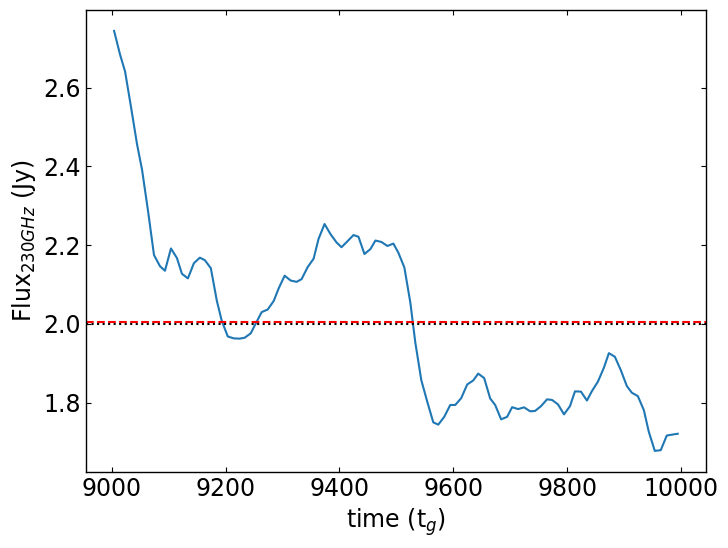

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [42]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.744697 Jy at 9004.234232
98:: 2.684109 Jy at 9014.746059
99:: 2.641499 Jy at 9023.505435
100:: 2.550515 Jy at 9034.016452
101:: 2.456541 Jy at 9044.529609
102:: 2.391966 Jy at 9053.290056
103:: 2.287397 Jy at 9063.802536
104:: 2.174853 Jy at 9074.314016
105:: 2.146513 Jy at 9084.823874
106:: 2.134941 Jy at 9093.581252
107:: 2.191617 Jy at 9104.090482
108:: 2.167285 Jy at 9114.601360
109:: 2.127241 Jy at 9123.359993
110:: 2.115556 Jy at 9133.870253
111:: 2.154179 Jy at 9144.379583
112:: 2.168230 Jy at 9154.889223
113:: 2.161816 Jy at 9163.648327
114:: 2.141392 Jy at 9174.157990
115:: 2.058670 Jy at 9184.666192
116:: 2.007194 Jy at 9193.424046
117:: 1.967854 Jy at 9203.933544
118:: 1.963058 Jy at 9214.444133
119:: 1.962396 Jy at 9224.955775
120:: 1.964776 Jy at 9233.717169
121:: 1.975897 Jy at 9244.228854
122:: 2.005715 Jy at 9254.740756
123:: 2.029932 Jy at 9263.502558
124:: 2.036407 Jy at 9274.015079
125:: 2.058105 Jy at 9284.527261
126:: 2.090073 Jy at 9293.287130
127:: 2.12245

In [27]:
ind,time,z_tot,dscale = bhoss_avg(40, 1, 1, 70, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh40/inc70/BHOSS_CODE
97, flux: 2.863024 at 9004.234232
98, flux: 2.815435 at 9014.746059
99, flux: 2.796989 at 9023.505435
100, flux: 2.698810 at 9034.016452
101, flux: 2.592465 at 9044.529609
102, flux: 2.505377 at 9053.290056
103, flux: 2.386124 at 9063.802536
104, flux: 2.280629 at 9074.314016
105, flux: 2.293146 at 9084.823874
106, flux: 2.241490 at 9093.581252
107, flux: 2.274763 at 9104.090482
108, flux: 2.279615 at 9114.601360
109, flux: 2.233691 at 9123.359993
110, flux: 2.216189 at 9133.870253
111, flux: 2.307689 at 9144.379583
112, flux: 2.303194 at 9154.889223
113, flux: 2.249263 at 9163.648327
114, flux: 2.074250 at 9174.157990
115, flux: 1.944425 at 9184.666192
116, flux: 1.948385 at 9193.424046
117, flux: 1.968675 at 9203.933544
118, flux: 1.993402 at 9214.444133
119, flux: 2.037050 at 9224.955775
120, flux: 2.037102 at 9233.717169
121, flux: 2.029243 at 9244.228854
122, flux: 2.063544 at 9254.740756
123, flux

In [28]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh40/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [29]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh40/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.092169 Jy, the density scale = 1.950000e-18


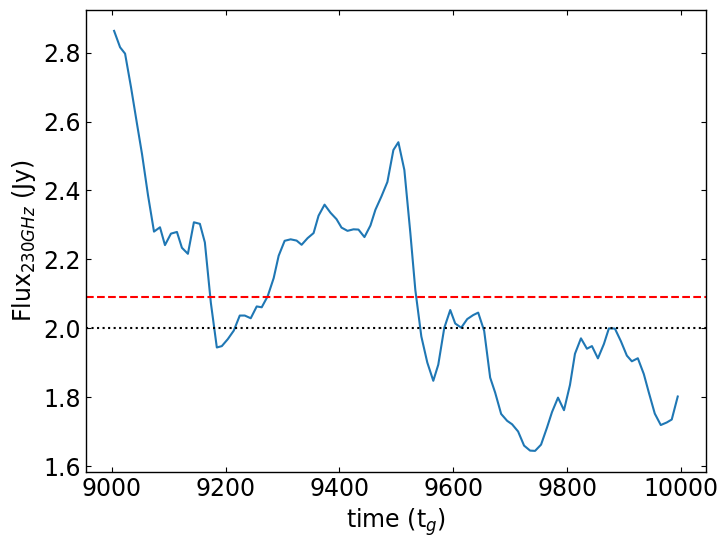

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [31]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.863024 Jy at 9004.234232
98:: 2.815435 Jy at 9014.746059
99:: 2.796989 Jy at 9023.505435
100:: 2.698810 Jy at 9034.016452
101:: 2.592465 Jy at 9044.529609
102:: 2.505377 Jy at 9053.290056
103:: 2.386124 Jy at 9063.802536
104:: 2.280629 Jy at 9074.314016
105:: 2.293146 Jy at 9084.823874
106:: 2.241490 Jy at 9093.581252
107:: 2.274763 Jy at 9104.090482
108:: 2.279615 Jy at 9114.601360
109:: 2.233691 Jy at 9123.359993
110:: 2.216189 Jy at 9133.870253
111:: 2.307689 Jy at 9144.379583
112:: 2.303194 Jy at 9154.889223
113:: 2.249263 Jy at 9163.648327
114:: 2.074250 Jy at 9174.157990
115:: 1.944425 Jy at 9184.666192
116:: 1.948385 Jy at 9193.424046
117:: 1.968675 Jy at 9203.933544
118:: 1.993402 Jy at 9214.444133
119:: 2.037050 Jy at 9224.955775
120:: 2.037102 Jy at 9233.717169
121:: 2.029243 Jy at 9244.228854
122:: 2.063544 Jy at 9254.740756
123:: 2.061051 Jy at 9263.502558
124:: 2.093210 Jy at 9274.015079
125:: 2.145764 Jy at 9284.527261
126:: 2.210642 Jy at 9293.287130
127:: 2.25395

In [32]:
ind,time,z_tot,dscale = bhoss_avg(40, 1, 1, 90, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh40/inc90/BHOSS_CODE
97, flux: 2.801735 at 9004.234232
98, flux: 2.811662 at 9014.746059
99, flux: 2.789297 at 9023.505435
100, flux: 2.666581 at 9034.016452
101, flux: 2.565323 at 9044.529609
102, flux: 2.495727 at 9053.290056
103, flux: 2.409111 at 9063.802536
104, flux: 2.326318 at 9074.314016
105, flux: 2.232235 at 9084.823874
106, flux: 2.324928 at 9093.581252
107, flux: 2.401693 at 9104.090482
108, flux: 2.479197 at 9114.601360
109, flux: 2.412792 at 9123.359993
110, flux: 2.423170 at 9133.870253
111, flux: 2.571485 at 9144.379583
112, flux: 2.546346 at 9154.889223
113, flux: 2.489728 at 9163.648327
114, flux: 2.125420 at 9174.157990
115, flux: 1.968241 at 9184.666192
116, flux: 1.965174 at 9193.424046
117, flux: 2.024245 at 9203.933544
118, flux: 2.067707 at 9214.444133
119, flux: 2.127916 at 9224.955775
120, flux: 2.129189 at 9233.717169
121, flux: 2.128391 at 9244.228854
122, flux: 2.134572 at 9254.740756
123, flux

In [33]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh40/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [34]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh40/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.082669 Jy, the density scale = 1.920000e-18


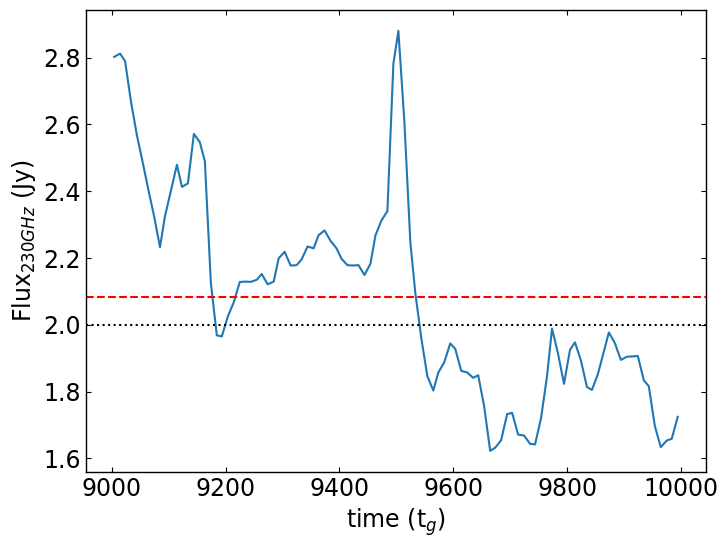

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [36]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.801735 Jy at 9004.234232
98:: 2.811662 Jy at 9014.746059
99:: 2.789297 Jy at 9023.505435
100:: 2.666581 Jy at 9034.016452
101:: 2.565323 Jy at 9044.529609
102:: 2.495727 Jy at 9053.290056
103:: 2.409111 Jy at 9063.802536
104:: 2.326318 Jy at 9074.314016
105:: 2.232235 Jy at 9084.823874
106:: 2.324928 Jy at 9093.581252
107:: 2.401693 Jy at 9104.090482
108:: 2.479197 Jy at 9114.601360
109:: 2.412792 Jy at 9123.359993
110:: 2.423170 Jy at 9133.870253
111:: 2.571485 Jy at 9144.379583
112:: 2.546346 Jy at 9154.889223
113:: 2.489728 Jy at 9163.648327
114:: 2.125420 Jy at 9174.157990
115:: 1.968241 Jy at 9184.666192
116:: 1.965174 Jy at 9193.424046
117:: 2.024245 Jy at 9203.933544
118:: 2.067707 Jy at 9214.444133
119:: 2.127916 Jy at 9224.955775
120:: 2.129189 Jy at 9233.717169
121:: 2.128391 Jy at 9244.228854
122:: 2.134572 Jy at 9254.740756
123:: 2.151890 Jy at 9263.502558
124:: 2.121082 Jy at 9274.015079
125:: 2.129102 Jy at 9284.527261
126:: 2.198867 Jy at 9293.287130
127:: 2.21845